Data importing 

In [ ]:
pwd

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://github.com/mattiasvillani/MLcourse/raw/main/Data/eBayData.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,nBids,PowerSeller,VerifyID,Sealed,MinBlem,MajBlem,LargNeg,LogBook,MinBidShare,Sold
0,2,0,0,0,0,0,0,-0.2237,-0.2088,1
1,6,1,0,0,0,0,0,0.6073,-0.3478,1
2,1,1,0,0,0,0,0,0.0332,0.4423,1
3,1,0,0,0,1,0,0,0.3755,0.1441,1
4,4,0,0,0,0,0,1,1.4347,-0.4104,1


In [5]:
df.shape #n=1000, p=10

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nBids        1000 non-null   int64  
 1   PowerSeller  1000 non-null   int64  
 2   VerifyID     1000 non-null   int64  
 3   Sealed       1000 non-null   int64  
 4   MinBlem      1000 non-null   int64  
 5   MajBlem      1000 non-null   int64  
 6   LargNeg      1000 non-null   int64  
 7   LogBook      1000 non-null   float64
 8   MinBidShare  1000 non-null   float64
 9   Sold         1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


In [7]:
del df['nBids']

In [8]:
df.head()

,PowerSeller,VerifyID,Sealed,MinBlem,MajBlem,LargNeg,LogBook,MinBidShare,Sold
0,0,0,0,0,0,0,-0.2237,-0.2088,1
1,1,0,0,0,0,0,0.6073,-0.3478,1
2,1,0,0,0,0,0,0.0332,0.4423,1
3,0,0,0,1,0,0,0.3755,0.1441,1
4,0,0,0,0,0,1,1.4347,-0.4104,1


In [9]:
df.shape #1000, p=9

(1000, 9)

In [10]:
#percentage of sold items
100*sum(df['Sold']==1)/1000

86.3

In [11]:
##'Split the data using to get 75% of the data for training 
#'and 25% for testing. Keep stratified sampling, 
#'keeping the same fraction of positive and negative observations in both 
#'training and test datasets.
from sklearn.model_selection import train_test_split

In [12]:
X = df.loc[:, df.columns != 'Sold']

In [13]:
y = df['Sold']

In [14]:
X.head()

,PowerSeller,VerifyID,Sealed,MinBlem,MajBlem,LargNeg,LogBook,MinBidShare
0,0,0,0,0,0,0,-0.2237,-0.2088
1,1,0,0,0,0,0,0.6073,-0.3478
2,1,0,0,0,0,0,0.0332,0.4423
3,0,0,0,1,0,0,0.3755,0.1441
4,0,0,0,0,0,1,1.4347,-0.4104


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Sold, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [17]:
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(750, 8) (250, 8) (750,) (250,)


In [18]:
#percentage of sold items in y_train
y_train.value_counts()


1    647
0    103
Name: Sold, dtype: int64

In [19]:
100*647/750

86.26666666666667

In [20]:
#percentage of sold items in y_test
y_test.value_counts()


1    216
0     34
Name: Sold, dtype: int64

In [21]:
100*216/250

86.4

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf_lr = LogisticRegression(penalty='none', multi_class='ovr')
clf_lr.fit(X,y)

LogisticRegression(multi_class='ovr', penalty='none')

In [42]:
clf_lr.coef_

array([[ 0.11815102, -0.91040304, 16.05837313, -0.93229786, -1.53938946,
        -0.68358434, -1.36967325, -6.09308824]])

In [43]:
clf_lr.intercept_

array([3.21464366])

In [ ]:
logit = sm.Logit(y,X_cons).fit()

In [ ]:
logit.summary()

Predictions and Confusion matrix

In [44]:
clf_lr.predict_proba(X_test)
#not sold sold

array([[8.32807662e-03, 9.91671923e-01],
       [1.97813316e-02, 9.80218668e-01],
       [2.85483334e-01, 7.14516666e-01],
       [8.12204927e-02, 9.18779507e-01],
       [1.54800507e-01, 8.45199493e-01],
       [6.34953229e-03, 9.93650468e-01],
       [9.08475019e-03, 9.90915250e-01],
       [3.74609042e-02, 9.62539096e-01],
       [4.57034569e-03, 9.95429654e-01],
       [1.27542756e-02, 9.87245724e-01],
       [7.88992071e-01, 2.11007929e-01],
       [5.46294254e-03, 9.94537057e-01],
       [1.59826616e-02, 9.84017338e-01],
       [4.62054153e-02, 9.53794585e-01],
       [1.55688823e-02, 9.84431118e-01],
       [5.84132362e-03, 9.94158676e-01],
       [6.87554871e-01, 3.12445129e-01],
       [7.50580657e-03, 9.92494193e-01],
       [8.74407038e-01, 1.25592962e-01],
       [4.86137861e-03, 9.95138621e-01],
       [6.06560072e-03, 9.93934399e-01],
       [4.33492550e-03, 9.95665075e-01],
       [2.68910216e-02, 9.73108978e-01],
       [1.50988086e-02, 9.84901191e-01],
       [1.564283

In [45]:
y_pred = clf_lr.predict(X_test)
y_pred #by default the threshold is 0.5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
y_pred_05 = (clf_lr.predict_proba(X_test))

In [47]:
y_probs = (clf_lr.predict_proba(X_test)[:,1])

In [48]:
y_probs

array([0.99167192, 0.98021867, 0.71451667, 0.91877951, 0.84519949,
       0.99365047, 0.99091525, 0.9625391 , 0.99542965, 0.98724572,
       0.21100793, 0.99453706, 0.98401734, 0.95379458, 0.98443112,
       0.99415868, 0.31244513, 0.99249419, 0.12559296, 0.99513862,
       0.9939344 , 0.99566507, 0.97310898, 0.98490119, 0.98435717,
       0.88202151, 0.6037066 , 1.        , 0.90871506, 0.36364362,
       0.57755008, 0.99530612, 0.99999998, 0.96809373, 0.97566633,
       0.13172638, 0.99513862, 0.85222502, 0.79986558, 0.98383255,
       0.82599565, 0.99445485, 0.543717  , 0.78465695, 0.99160656,
       0.99512783, 1.        , 0.99999998, 0.99446853, 0.98966797,
       0.99566755, 0.95454677, 0.8754027 , 0.99448015, 0.21100793,
       0.99395382, 0.99999999, 0.99307102, 0.98529338, 0.99606655,
       0.81706845, 0.95266332, 0.99621261, 0.92620002, 0.53493595,
       0.46448994, 0.98470902, 0.35007362, 0.99191222, 0.97510222,
       0.68268689, 0.99683363, 0.93167515, 1.        , 0.95512

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [50]:
confusion_matrix(y_test, y_pred)

array([[ 17,  17],
       [  7, 209]], dtype=int64)

In [51]:
accuracy_score(y_test, y_pred)

0.904

In [52]:
from sklearn.metrics import precision_score, recall_score

In [53]:
#sensitivity
recall_score(y_test, y_pred)

0.9675925925925926

In [54]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_test, y_probs)

0.9337554466230937

Problem 1

1a) Reconstruct the 2-by-2 confusion matrix for the test data without using a package, i.e. code it up from yPreds and testing$Sold yourself. 

In [59]:
y_test.value_counts()

1    216
0     34
Name: Sold, dtype: int64

In [60]:
type(y_pred)

numpy.ndarray

In [61]:
type(y_test)

pandas.core.series.Series

In [62]:
df.head()

,PowerSeller,VerifyID,Sealed,MinBlem,MajBlem,LargNeg,LogBook,MinBidShare,Sold
0,0,0,0,0,0,0,-0.2237,-0.2088,1
1,1,0,0,0,0,0,0.6073,-0.3478,1
2,1,0,0,0,0,0,0.0332,0.4423,1
3,0,0,0,1,0,0,0.3755,0.1441,1
4,0,0,0,0,0,1,1.4347,-0.4104,1


In [63]:
df_conf = pd.DataFrame({'labels':y_test, 'preds':y_pred, 'probs':y_probs})
df_conf

,labels,preds,probs
595,1,1,0.991672
351,1,1,0.980219
446,1,1,0.714517
544,1,1,0.918780
208,1,1,0.845199
...,...,...,...
50,1,1,0.968654
539,1,1,0.986687
863,1,1,0.965909
149,1,1,0.666476


In [67]:
TP=sum((df_conf.labels==1)&(df_conf.preds==1))
TP

209

In [68]:
FP=sum((df_conf.labels==0)&(df_conf.preds==1))
FP

17

In [69]:
TN=sum((df_conf.labels==0)&(df_conf.preds==0))
TN

17

In [70]:
FN=sum((df_conf.labels==1)&(df_conf.preds==0))
FN

7

In [71]:
#Confusion matrix
conf_mtx = np.array([[TN, FP], [FN, TP]])
conf_mtx

array([[ 17,  17],
       [  7, 209]])

1b) Use the confusion matrix in 1a) to compute the accuracy, sensitivity and specificity and the classifier.

In [72]:
Accuracy=(TP+TN)/(TP+TN+FN+FP) #0.908
Accuracy

0.904

In [73]:
Sensitivity=TP/(TP+FN) #0.9674419
Sensitivity

0.9675925925925926

In [74]:
Specificity=TN/(TN+FP)
Specificity

0.5

1c) Compute the ROC curve from the above fitted glm model and plot it. No packages allowed.

In [76]:
#sort the probs var
ROC_df = df_conf.sort_values(["probs"], ascending=False)

In [77]:
ROC_df.head()

,labels,preds,probs
696,1,1,1.0
471,1,1,1.0
380,1,1,1.0
905,1,1,1.0
423,1,1,1.0


In [78]:
#ROC curve manually
TPR=np.cumsum(ROC_df.labels==1)/sum(ROC_df.labels==1)
TPR

696    0.004630
471    0.009259
380    0.013889
905    0.018519
423    0.023148
         ...   
897    1.000000
695    1.000000
427    1.000000
983    1.000000
362    1.000000
Name: labels, Length: 250, dtype: float64

In [79]:
FPR=np.cumsum(ROC_df.labels==0)/sum(ROC_df.labels==0)
FPR

696    0.000000
471    0.000000
380    0.000000
905    0.000000
423    0.000000
         ...   
897    0.882353
695    0.911765
427    0.941176
983    0.970588
362    1.000000
Name: labels, Length: 250, dtype: float64

In [81]:
import matplotlib.pyplot as plt

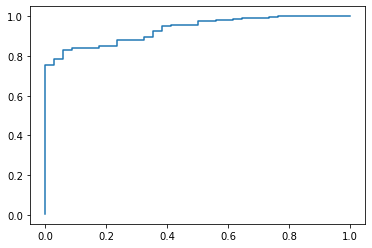

In [82]:
# ROC curve
plt.plot(FPR, TPR)

PROBLEM 2

Fit a random forest using the `rf` package in `caret` to the 
training data with tuning parameters chosen by 10-fold cross-validation. 
Plot the ROC curve and compute AUC for the `testing` data using the package `MLeval`. 
Compute also the accuracy and recall on the `testing` data.


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
#Optiimise parameters
from sklearn.model_selection import GridSearchCV

In [85]:
X_train.shape

(750, 8)

In [86]:
rf_clf = RandomForestClassifier(random_state=123)

In [87]:
params_grid = {"max_features" : [2,3,4, 5,6,7,8],
              "n_estimators": [150, 300, 500, 1000],
              }

In [88]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=10, scoring='roc_auc')

In [89]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [150, 300, 500, 1000]},
             scoring='roc_auc')

In [90]:
grid_search.best_params_ 

{'max_features': 6, 'n_estimators': 500}

In [91]:
cvrf_clf = grid_search.best_estimator_
cvrf_clf 

RandomForestClassifier(max_features=6, n_estimators=500, random_state=123)

In [92]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.884

In [93]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[ 15,  19],
       [ 10, 206]], dtype=int64)

In [94]:
y_pred_rf = cvrf_clf.predict(X_test)
y_pred_rf

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [95]:
recall_score(y_test, y_pred_rf) #0.9537037037037037

0.9537037037037037

In [96]:
# ROC plot
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.metrics import roc_auc_score

In [97]:
y_test_rf = cvrf_clf.predict_proba(X_test) 
preds_rf = y_test_rf[:,1]
preds_rf

array([1.        , 1.        , 0.3758    , 0.77566667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.64466667, 1.        , 0.85      , 0.998     , 0.998     ,
       1.        , 0.44894286, 0.998     , 0.876     , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.93701284, 1.        , 0.978     , 0.35215112,
       0.998     , 1.        , 0.9525    , 0.968     , 0.992     ,
       0.6529873 , 1.        , 0.987     , 0.95617831, 1.        ,
       0.72549762, 1.        , 0.076     , 0.785     , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.998     ,
       1.        , 1.        , 0.998     , 1.        , 0.64466667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.7761    , 0.99083333, 1.        , 0.75661746, 0.25519812,
       0.73      , 1.        , 0.2089    , 0.982     , 0.992     ,
       0.696     , 1.        , 0.9722619 , 0.998     , 0.978  

In [98]:
auc_rf = roc_auc_score(y_test, preds_rf)
auc_rf
print('Random forest: ROC AUC=%.3f' % (auc_rf))

Random forest: ROC AUC=0.934


In [99]:
import matplotlib.pyplot as plt

In [100]:
from matplotlib import pyplot

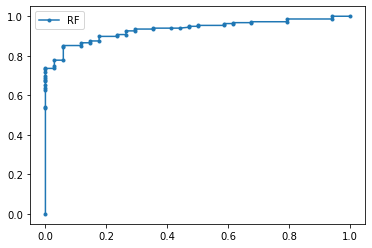

In [101]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, preds_rf)
pyplot.plot(fpr_rf, tpr_rf, marker='.', label='RF')
plt.legend(loc='best')

PROBLEM 3

Same as Problem 2, but using the k-nearest neighbor classifier,
with $k$ chosen by 10-fold cross-validation between $k=1$ and $k=10$. 
You need to use the `tuneGrid` option instead of the 
`tuneLength` option in `caret` for this.

In [102]:
from sklearn import preprocessing

In [103]:
#Standardise independent variables
scaler = preprocessing.StandardScaler().fit(X_train)


In [104]:
X_train_s= scaler.transform(X_train)

In [105]:
X_train_s

array([[ 0.94043719, -0.26148818, -0.33333333, ..., -0.30544142,
         0.72567432, -1.1385102 ],
       [ 0.94043719, -0.26148818, -0.33333333, ..., -0.30544142,
        -1.13696244,  0.97255774],
       [-1.06333523, -0.26148818, -0.33333333, ...,  3.27395021,
         2.81831136, -1.42192107],
       ...,
       [ 0.94043719, -0.26148818, -0.33333333, ..., -0.30544142,
        -0.64026867, -0.31308263],
       [-1.06333523, -0.26148818,  3.        , ..., -0.30544142,
         1.25357839, -1.3095067 ],
       [ 0.94043719, -0.26148818, -0.33333333, ..., -0.30544142,
        -1.27768999,  1.236969  ]])

In [106]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

In [107]:
X_test_s

array([[-1.08347268, -0.23420572, -0.31063037, ..., -0.31063037,
         1.1618658 , -1.18605449],
       [-1.08347268, -0.23420572, -0.31063037, ...,  3.21926022,
         1.41489524, -1.21539239],
       [-1.08347268, -0.23420572, -0.31063037, ..., -0.31063037,
        -0.42654488,  1.23984029],
       ...,
       [-1.08347268, -0.23420572, -0.31063037, ..., -0.31063037,
         0.02276597, -0.03568566],
       [ 0.92295821, -0.23420572, -0.31063037, ..., -0.31063037,
        -1.48005533,  1.86885572],
       [-1.08347268, -0.23420572, -0.31063037, ..., -0.31063037,
        -1.24224771, -0.11374063]])

In [108]:
#Grid search

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [117]:
knn_clf = KNeighborsClassifier()

In [118]:
param_knn =  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [119]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_knn, scoring='roc_auc', cv=10)

In [120]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [121]:
grid_search_cv.best_params_

{'n_neighbors': 10}

In [122]:
optimised_KNN = grid_search_cv.best_estimator_
optimised_KNN

KNeighborsClassifier(n_neighbors=10)

In [123]:
y_test_knn = optimised_KNN.predict(X_test_s) 

In [124]:
confusion_matrix(y_test, y_test_knn)

array([[ 17,  17],
       [ 10, 206]], dtype=int64)

In [125]:
accuracy_score(y_test, y_test_knn)

0.892

In [126]:
recall_score(y_test, y_test_knn)

0.9537037037037037

In [127]:
prob_knn = (optimised_KNN.predict_proba(X_test_s)[:,1]) 


In [128]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prob_knn)

0.9193899782135077

In [129]:
# ROC plot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [130]:
auc_knn = roc_auc_score(y_test, prob_knn)
print('kNN: ROC AUC=%.3f' % (auc_knn))


kNN: ROC AUC=0.919


In [131]:
from matplotlib import pyplot

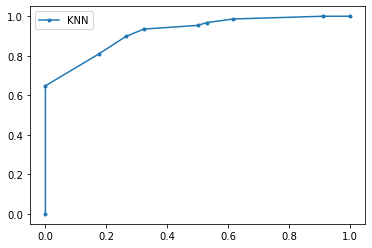

In [132]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fpr_knn, tpr_knn, _ = roc_curve(y_test, prob_knn)
pyplot.plot(fpr_knn, tpr_knn, marker='.', label='KNN')
plt.legend(loc='best')

PROBLEM 4

Same as Problem 2, but using stochastic gradient boosting through the `gbm` package in `caret`. There are four tuning parameters here, but you can keep two of them fixed in the training: `n.trees = 100` and `n.minobsinnode = 10`. You need to use the `tuneGrid` option instead of the `tuneLength` option in `caret` for this. Just before the tuneGrid argument in the train function, you can add the argument `verbose = FALSE` to avoid unnecessary messages from being printed during the training process.



In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
gbc_clf = GradientBoostingClassifier(min_samples_leaf=10, n_estimators=100)

In [135]:
param_gb = {
 'max_depth':[1,2,3,4,5,6,7,8,9,10],
 'learning_rate':[ 0.001, 0.01, 0.1]
}

In [136]:
grid_search_gb = GridSearchCV(gbc_clf, param_gb, scoring='roc_auc', cv=10)

In [137]:
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(min_samples_leaf=10),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [138]:
grid_search_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 2}

In [139]:
optimised_gb = grid_search_gb.best_estimator_
optimised_gb

GradientBoostingClassifier(max_depth=2, min_samples_leaf=10)

In [140]:
y_test_gb = optimised_gb.predict(X_test) 

In [141]:
print(confusion_matrix(y_test, y_test_gb))
print(accuracy_score(y_test, y_test_gb))
print(recall_score(y_test, y_test_gb))

[[ 15  19]
 [  8 208]]
0.892
0.9629629629629629


In [142]:
#AUC and ROC plot

In [143]:
y_gb_prob = optimised_gb.predict_proba(X_test) 
preds_gb = y_gb_prob[:,1]
auc_gb = roc_auc_score(y_test, preds_gb)
print('GB: ROC AUC=%.3f' % (auc_gb))


GB: ROC AUC=0.939


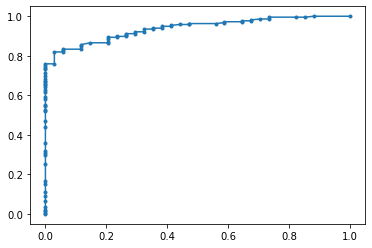

In [144]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, preds_gb)
pyplot.plot(fpr_gb, tpr_gb, marker='.', label='GB')

PROBLEM 5

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
ada_clf = AdaBoostClassifier(random_state=123)

In [147]:
param_ada = {
 'n_estimators':[100,200, 300, 400, 500],
 'learning_rate':[ 0.001, 0.01, 0.1]
}

In [148]:
grid_search_ada = GridSearchCV(ada_clf, param_ada, scoring='roc_auc', cv=10)

In [149]:
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=123),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

In [150]:
grid_search_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [151]:
optimised_ada = grid_search_ada.best_estimator_
optimised_ada

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=123)

In [152]:
y_test_ada = optimised_ada.predict(X_test) 

In [153]:
print(confusion_matrix(y_test, y_test_ada))
print(accuracy_score(y_test, y_test_ada))
print(recall_score(y_test, y_test_ada))

[[ 17  17]
 [  5 211]]
0.912
0.9768518518518519


In [154]:
#ROC AUC plot
y_ada_prob = optimised_ada.predict_proba(X_test) 
preds_ada = y_ada_prob[:,1]
auc_ada = roc_auc_score(y_test, preds_ada)
print('GB: ROC AUC=%.3f' % (auc_ada))


GB: ROC AUC=0.926


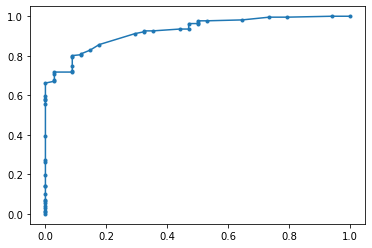

In [155]:
fpr_ad, tpr_ad, _ = roc_curve(y_test, preds_ada)
pyplot.plot(fpr_ad, tpr_ad, marker='.', label='ADA')

PROBLEM 6

Plot the ROC curves on the `testing` data from models fit under Problem 2-6 in a single plot. [Hint: the `evalm` function in the `MLeval` package can plot for more than one model.]

In [156]:
import numpy as np
import pylab as plt

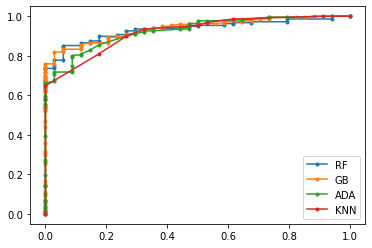

In [157]:
pyplot.plot(fpr_rf, tpr_rf, marker='.', label='RF')
pyplot.plot(fpr_gb, tpr_gb, marker='.', label='GB')
pyplot.plot(fpr_ad, tpr_ad, marker='.', label='ADA')
pyplot.plot(fpr_knn, tpr_knn, marker='.', label='KNN')
plt.legend(loc='best')
plt.show()